# Bibliotecas

In [1]:
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold,train_test_split,RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import(
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier

from sklearn.metrics import (classification_report,
                              confusion_matrix,
                              accuracy_score,
                              ConfusionMatrixDisplay,
                              roc_auc_score,
                              RocCurveDisplay,
                              precision_score,
                              recall_score)


import mlflow
import mlflow.sklearn

# Importado os dados

In [2]:
dados=pd.read_csv('../../../data/dados_renomeados.csv',)

In [3]:
dados

,idade,sexo,dor_peitoral,pressao_em_repouso,colesterol,glicemia_posprandial,eletrocardiograma_em_repouso,frequencia_cardiaca_máxima,angina_em_exercicio,depressao_ST,inclinação_ST,diagnostico
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,45,1,1,110,264,0,0,132,0,1.2,2,1
1014,68,1,4,144,193,1,0,141,0,3.4,2,1
1015,57,1,4,130,131,0,0,115,1,1.2,2,1
1016,57,0,2,130,236,0,2,174,0,0.0,2,1


# Separando os dados

In [4]:
y=dados['diagnostico']
X=dados.drop(['diagnostico'],axis='columns')

In [5]:
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,test_size=0.1,random_state=180)

# Modelos

In [6]:
models = {
                "Random_Forest": RandomForestClassifier(random_state=42),
                "Decision_Tree": DecisionTreeClassifier(random_state=42),
                "Gradient_Boosting": GradientBoostingClassifier(random_state=42),
                "Logistic_Regression": LogisticRegression(random_state=42),
                "XGBClassifier": XGBClassifier(),
                "AdaBoost_Classifier": AdaBoostClassifier(random_state=42,),
                "SVM_Classifier":svm.SVC(random_state=42)
            }

# Validação Cruzada

In [7]:
cross_val=KFold()

In [8]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    j=1
    media_acuracia=[]
    media_precisao_1=[]
    media_precisao_0=[]
    media_auc=[]
            
    for train_id,test_id in cross_val.split(X_treino):
        print(f'{model_name} Fold {j}:')

        X_val=X_treino.iloc[test_id]
        y_val=y_treino.iloc[test_id]

        X_train=X_treino.iloc[train_id]
        y_train=y_treino.iloc[train_id]

        model.fit(X_train,y_train)

        pred=model.predict(X_val)

        acc_score=accuracy_score(y_val,pred)
        #print(acc_score)
        #print(classification_report(y_val,pred))

        precc_score=precision_score(y_val,pred,average=None)
        #print(f'Precission:{precc_score}')

        auc_score= roc_auc_score(y_val,pred)
        #display=RocCurveDisplay.from_predictions(y_val,pred)
        #plt.title("Validation")
        #plt.show()
        media_acuracia.append(acc_score)
        media_precisao_0.append(precc_score[0])
        media_precisao_1.append(precc_score[1])
        media_auc.append(auc_score)
        j+=1
    print(f'Acuracia Média:{np.mean(media_acuracia)}\nPrecisão 0 Média:{np.mean(media_precisao_0)}\nPrecisão 1 Média:{np.mean(media_precisao_1)}\nAUC Média:{np.mean(media_auc)}\n')

Random_Forest Fold 1:


Random_Forest Fold 2:
Random_Forest Fold 3:
Random_Forest Fold 4:
Random_Forest Fold 5:
Acuracia Média:0.92467925873129
Precisão 0 Média:0.9346599591436247
Precisão 1 Média:0.9158573227538745
AUC Média:0.9240195729684746

Decision_Tree Fold 1:
Decision_Tree Fold 2:
Decision_Tree Fold 3:
Decision_Tree Fold 4:
Decision_Tree Fold 5:
Acuracia Média:0.8951770016631029
Precisão 0 Média:0.8923868880927692
Precisão 1 Média:0.9003646129873338
AUC Média:0.8937928832031818

Gradient_Boosting Fold 1:
Gradient_Boosting Fold 2:
Gradient_Boosting Fold 3:
Gradient_Boosting Fold 4:
Gradient_Boosting Fold 5:
Acuracia Média:0.8886315039201712
Precisão 0 Média:0.8980539848501014
Precisão 1 Média:0.8814013377926422
AUC Média:0.8876298484738736

Logistic_Regression Fold 1:


d:\Romario\Programar\Ferramentas\Python\mlops\heart_attack_to_do_spark\backend\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Romario\Programar\Ferramentas\Python\mlops\heart_attack_to_do_spark\backend\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

Logistic_Regression Fold 2:
Logistic_Regression Fold 3:
Logistic_Regression Fold 4:
Logistic_Regression Fold 5:
Acuracia Média:0.8045616535994299
Precisão 0 Média:0.8033943437881875
Precisão 1 Média:0.8070410425811122
AUC Média:0.802558576078002

XGBClassifier Fold 1:
XGBClassifier Fold 2:
XGBClassifier Fold 3:
XGBClassifier Fold 4:
XGBClassifier Fold 5:
Acuracia Média:0.915936089332383
Precisão 0 Média:0.9172501772523782
Precisão 1 Média:0.9154458824892622
AUC Média:0.9152882087227731

AdaBoost_Classifier Fold 1:
AdaBoost_Classifier Fold 2:
AdaBoost_Classifier Fold 3:
AdaBoost_Classifier Fold 4:
AdaBoost_Classifier Fold 5:
Acuracia Média:0.8362318840579711
Precisão 0 Média:0.8284547035395974
Precisão 1 Média:0.8468058408226344
AUC Média:0.8347388407605798

SVM_Classifier Fold 1:
SVM_Classifier Fold 2:
SVM_Classifier Fold 3:
SVM_Classifier Fold 4:
SVM_Classifier Fold 5:
Acuracia Média:0.682264195770967
Precisão 0 Média:0.6800975176466657
Precisão 1 Média:0.6845660181009018
AUC Média:0.

In [9]:
models['Random_Forest']

RandomForestClassifier(random_state=42)

In [10]:
parametros={ 'n_estimators': [8,16,32],
            'criterion':['gini','entropy','log_loss'],
            'max_depth' : [3,5,10]}


In [11]:
modelo_tunado=RandomizedSearchCV(models['Random_Forest'],param_distributions=parametros,n_iter=32,scoring='roc_auc',refit=True)

In [12]:
modelo_tunado.fit(X_treino,y_treino)

d:\Romario\Programar\Ferramentas\Python\mlops\heart_attack_to_do_spark\backend\.venv\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=32. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_iter=32,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [8, 16, 32]},
                   scoring='roc_auc')

In [13]:
modelo_tunado.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=32,
                       random_state=42)

In [15]:
modelo_tunado.best_score_

0.9683779434545089

In [17]:
modelo_tunado.best_params_

{'n_estimators': 32, 'max_depth': 10, 'criterion': 'entropy'}

# Testando o Modelo

In [18]:
modelo=RandomForestClassifier(**modelo_tunado.best_params_)

In [20]:
modelo.fit(X_treino,y_treino)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=32)

In [21]:
pred=modelo.predict(X_teste)

0.9313725490196079
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.90      0.92      0.91        39

    accuracy                           0.93       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.93      0.93      0.93       102

Precission:[0.9516129 0.9      ]


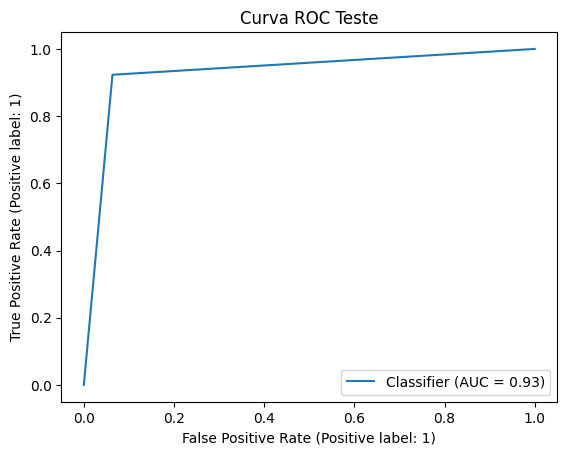

In [22]:
acc_score=accuracy_score(y_teste,pred)
print(acc_score)
print(classification_report(y_teste,pred))

precc_score=precision_score(y_teste,pred,average=None)
print(f'Precission:{precc_score}')

auc_score01= roc_auc_score(y_teste,pred)
display=RocCurveDisplay.from_predictions(y_teste,pred)
plt.title("Curva ROC Teste")
plt.show()



# Salvando o modelo

In [ ]:
import pickle
with open('../../artefato/modelo.pkl','wb') as file:
    pickle.dump(modelo,file)